In [1]:
# Basic Imports
import pandas as pd  
import numpy as np
import seaborn as sns

# Plotting Imports
from plotnine import *
import matplotlib.pyplot as plt

In [73]:
results_tfidf = np.load("data/results_tfidf.npy", allow_pickle = True).item()
results_w2v = np.load("data/w2v_results.npy", allow_pickle = True).item()

In [74]:
results_tfidf["text"]["tuned"]["et"] = results_tfidf["text"]["default"]["et"] 
results_tfidf["text"]["tuned"]["rf"] = results_tfidf["text"]["default"]["rf"] 

In [75]:
tuned_text_f1 = []
tuned_text_keys = []
for k, v in results_tfidf["text"]["tuned"].items():
    tuned_text_f1.append(v["f1"])
    tuned_text_keys.append(k)

tuned_title_f1 = []
for k, v in results_tfidf["title"]["tuned"].items():
    tuned_title_f1.append(v["f1"])
#     tuned_title_keys.append(k)

# default_models = ["rf", "et"]
# for m in default_models:
#     for t in ["text", "title"]:
#         if t == "text":
#             tuned_text_f1.append(results_tfidf[t]["default"][m]["f1"])
#         else:
#             tuned_title_f1.append(results_tfidf[t]["default"][m]["f1"])
#     tuned_title_keys.append(m)
#     tuned_text_keys.append(m)

In [76]:
df_tfidf = pd.DataFrame(tuned_title_f1, tuned_text_keys)
df_tfidf["tuned_text_f1"] = tuned_text_f1
df_tfidf.rename(columns = {0 : "tuned_title_f1"}, inplace = True)
df_tfidf

,tuned_title_f1,tuned_text_f1
nb,0.931043,0.940624
svm,0.948338,0.994749
knn,0.903891,0.885447
lr,0.941449,0.985113
dt,0.906828,0.902263
et,0.945085,0.983141
ab,0.902425,0.996377
rf,0.941122,0.988667


In [77]:
title = []
for model in results_w2v.get('title').items():
    if model[0] in ['nb', 'logreg', 'rf', 'adb', 'extratrees']:
        title.append(model[1].get('default').get('f1'))
    else:
        title.append(model[1].get('tuned').get('f1'))


text = []

for model in results_w2v.get('text').items():
    if model[0] in ['nb', 'logreg', 'rf', 'adb', 'extratrees']:
        text.append(model[1].get('default').get('f1'))
    else:
        text.append(model[1].get('tuned').get('f1'))


title = pd.Series(title, index = list(results_w2v.get('title').keys()))
text = pd.Series(text, index = list(results_w2v.get('text').keys()))

df_w2v = pd.DataFrame(index = list(results_w2v.get('title').keys()), data = {"title w2v":title, "text w2v":text})

In [78]:
df_w2v.rename(index = {"logreg" : "lr", "dectree" : "dt", "extratrees" : "et", "adb" : "ab"}, inplace = True)

In [79]:
df_w2v

,title w2v,text w2v
nb,0.863503,0.904429
svm,0.908795,0.985889
knn,0.908123,0.936852
lr,0.901166,0.973150
dt,0.882176,0.927124
et,0.929851,0.962277
ab,0.880862,0.907467
rf,0.929293,0.963163


In [80]:
combined = pd.merge(df_tfidf, df_w2v, left_index=True, right_index = True)

combined.rename(index = {"nb": "Naive Bayes" ,"rf": "Random Forests" , "svm": "Linear SVC", "lr" : "Logistic Regression", "knn" : "KNN", "dt" : "Decision Tree", "et" : "Extra Trees", "ab" : "AdaBoost"}, inplace = True)

combined.columns = ["Title (TF-IDF)", "Text (TF-IDF)", "Title (Word2Vec)", "Text (Word2Vec)"]

In [150]:
combined

,Title (TF-IDF),Text (TF-IDF),Title (Word2Vec),Text (Word2Vec)
Naive Bayes,0.931043,0.940624,0.863503,0.904429
Linear SVC,0.948338,0.994749,0.908795,0.985889
KNN,0.903891,0.885447,0.908123,0.936852
Logistic Regression,0.941449,0.985113,0.901166,0.973150
Decision Tree,0.906828,0.902263,0.882176,0.927124
Extra Trees,0.945085,0.983141,0.929851,0.962277
AdaBoost,0.902425,0.996377,0.880862,0.907467
Random Forests,0.941122,0.988667,0.929293,0.963163


In [152]:
combined = temp.stack().reset_index(level=1, drop=False)

In [153]:
combined["model"] = combined.index

In [154]:
combined = combined.reset_index(drop = True).rename(columns = {"level_1" : "method", 0 : "f1"})

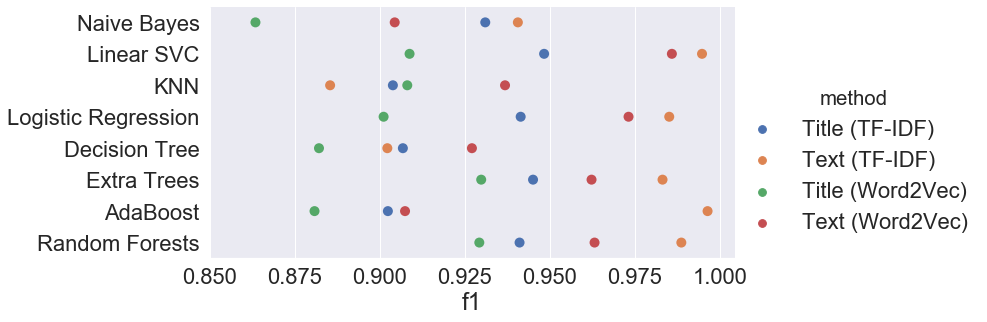

In [189]:
sns.set(font_scale = 2)
sns.catplot(y = "model", x = "f1", hue = "method", jitter = False, data = combined, aspect = 12/5, s = 10)
plt.ylabel('')
plt.savefig("data/initial_experiment_f1_scores")